# Students' dropout and Academic Success

### Project developed by:
- Pedro Jesus (up201907523)
- Sofia Germer (up201907461)
- Sérgio Estêvão (up201905680)

## Table of Contents

1. [Specification](#Specification)
2. [Related Work](#Related-work)
3. [Approach](#Approach)
4. [Required Libraries](#Required-libraries)
5. [Data Analysis](#Data-analysis)
6. [Data Preprocessing](#Data-Processing)
7. Classification

## Specification

Our approach to this problem was as follows:

1. **Data analysis:** 
2. **Algorithm implementation:**
3. **Evalutation and refinement:**

## Required Libraries

- numpy
- pandas
- matplotlib
- sklearn
- seaborn

These libraries can be installed by running the following command in the terminal:
> ``` pip install -r requirements.txt ```

## Data analysis

We start by importing the required libraries and plotting some graphs for initial analysis of the dataset.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import sklearn as sk
import seaborn as sb
import warnings

warnings.filterwarnings("ignore")


dataset = pd.read_csv('data.csv', na_values=['NA'], delimiter=";")

dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


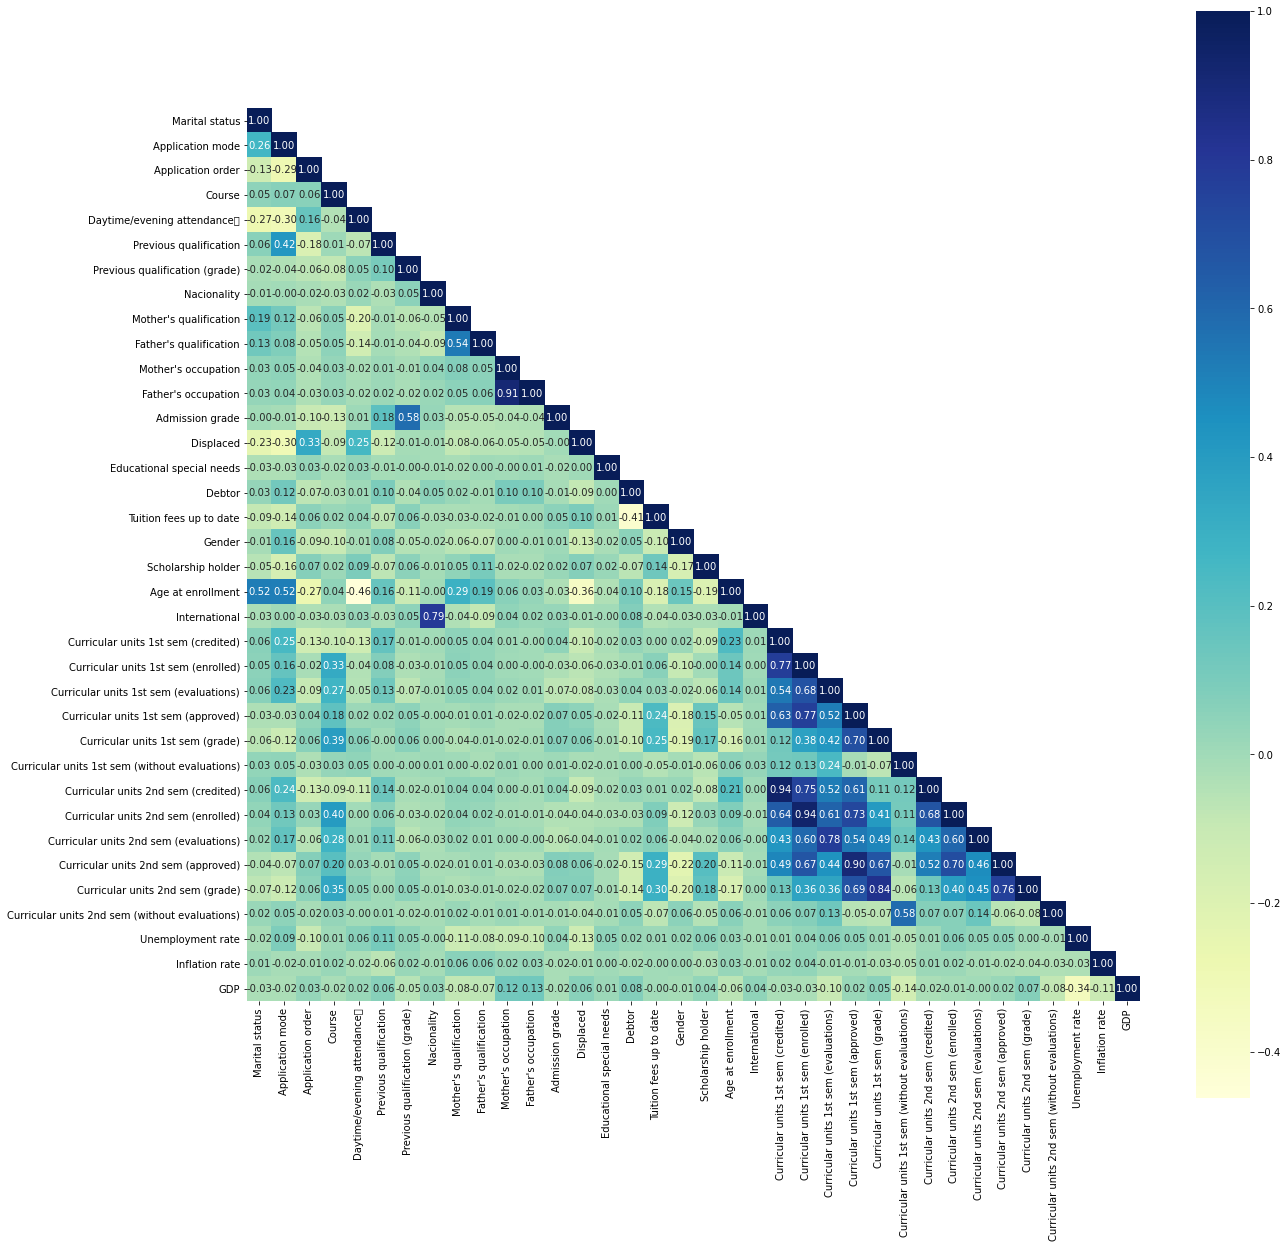

In [28]:
dataset_corr = dataset.corr()
plt.figure(figsize=(20,20))
mask = np.zeros_like(dataset_corr)
mask[np.triu_indices_from(mask, k=1)] = True
sb.heatmap(dataset_corr, cmap="YlGnBu", annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 10});
plt.show()

### All Data Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F65CEDE700>,
      dtype=object)

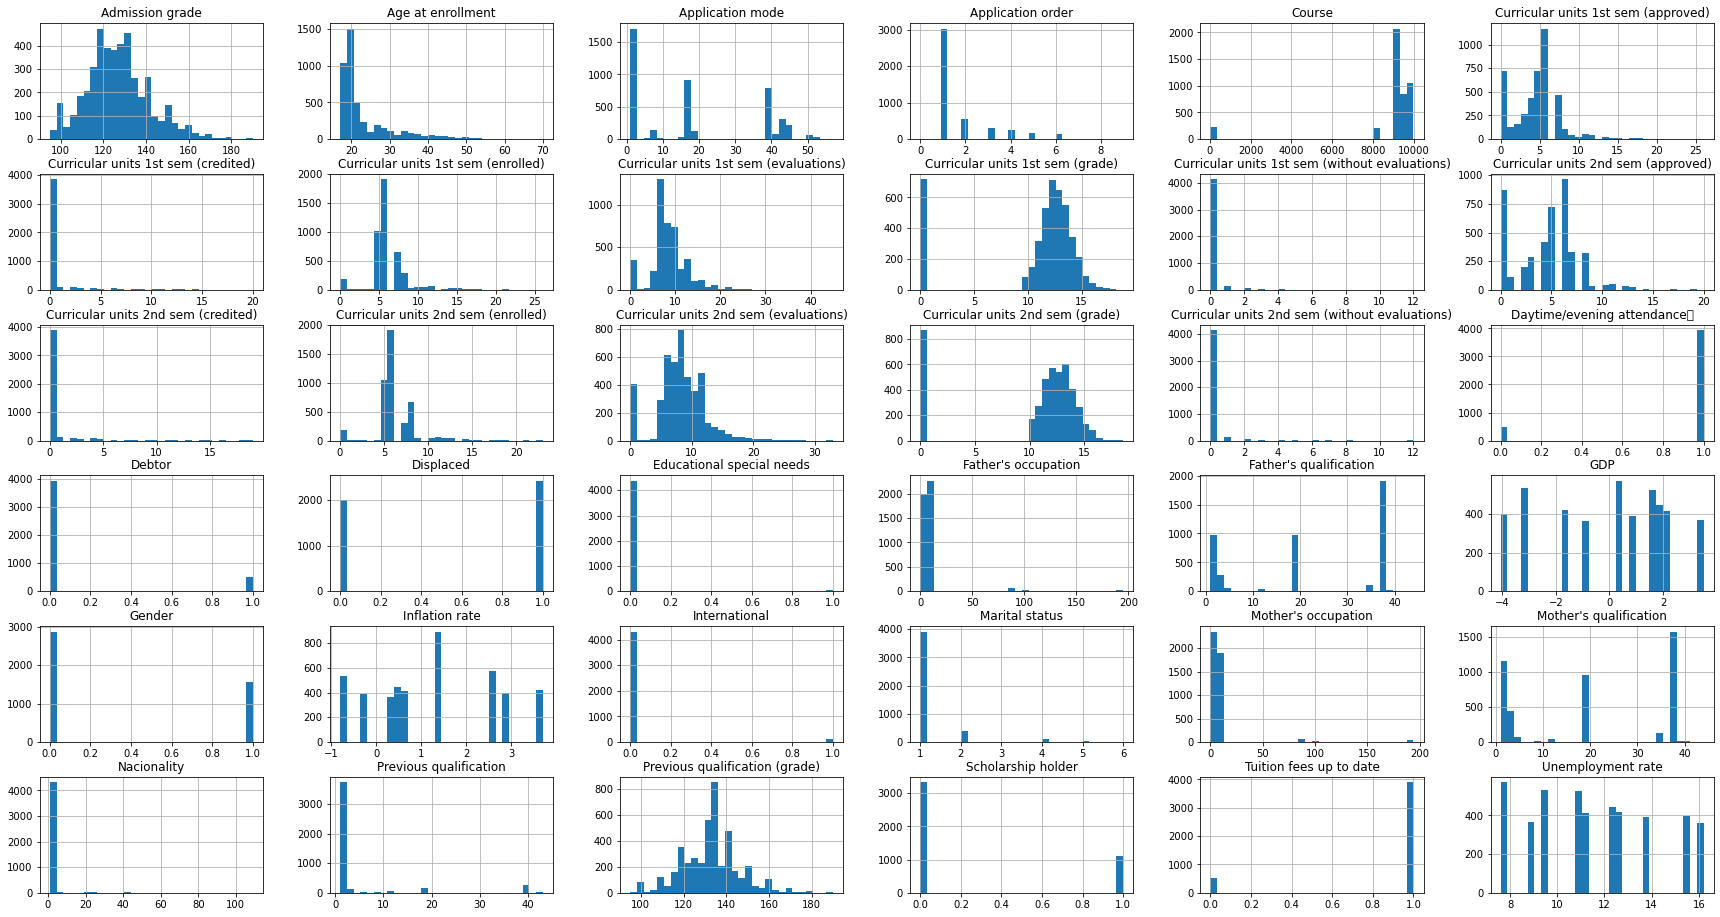

In [29]:
dataset.hist(bins=30, figsize=(30, 16), sharey=False)

### Dropout Data Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F65DAAED30>,
      dtype=object)

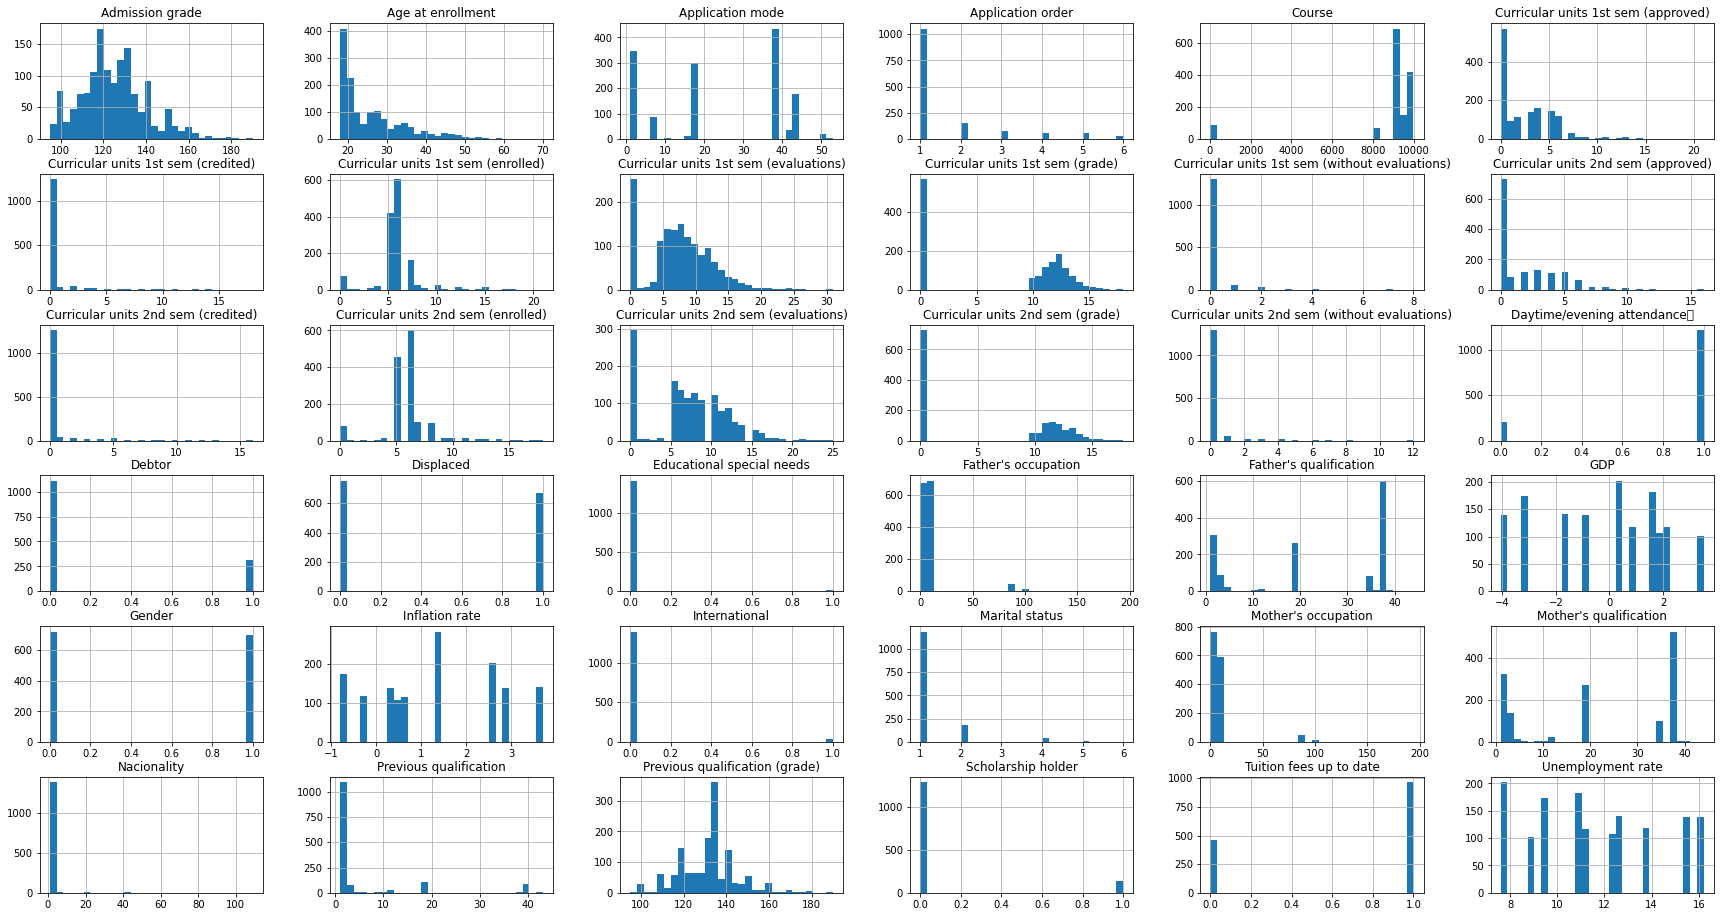

In [30]:
dropout_data = dataset.loc[dataset["Target"] == "Dropout"]
dropout_data.hist(bins=30, figsize=(30, 16), sharey=False)

### Graduate Data Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F660A99640>,
      dtype=object)

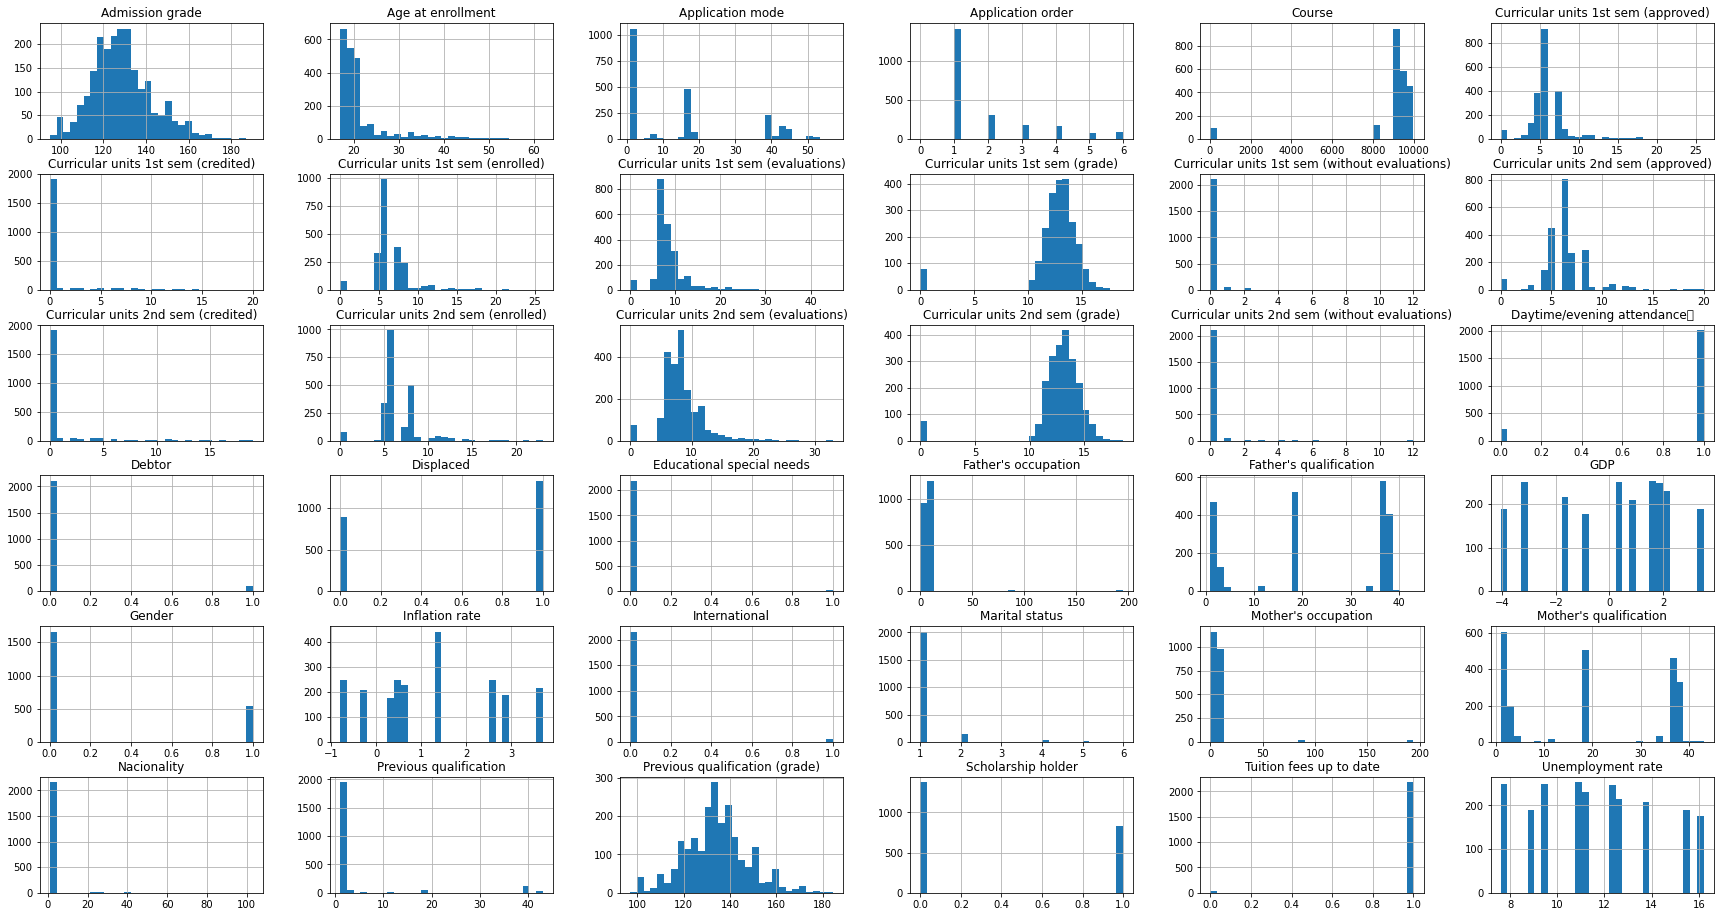

In [31]:
graduate_data = dataset.loc[dataset["Target"] == "Graduate"]
graduate_data.hist(bins=30, figsize=(30, 16), sharey=False)

### Enrolled Data Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6618AD220>,
      dtype=object)

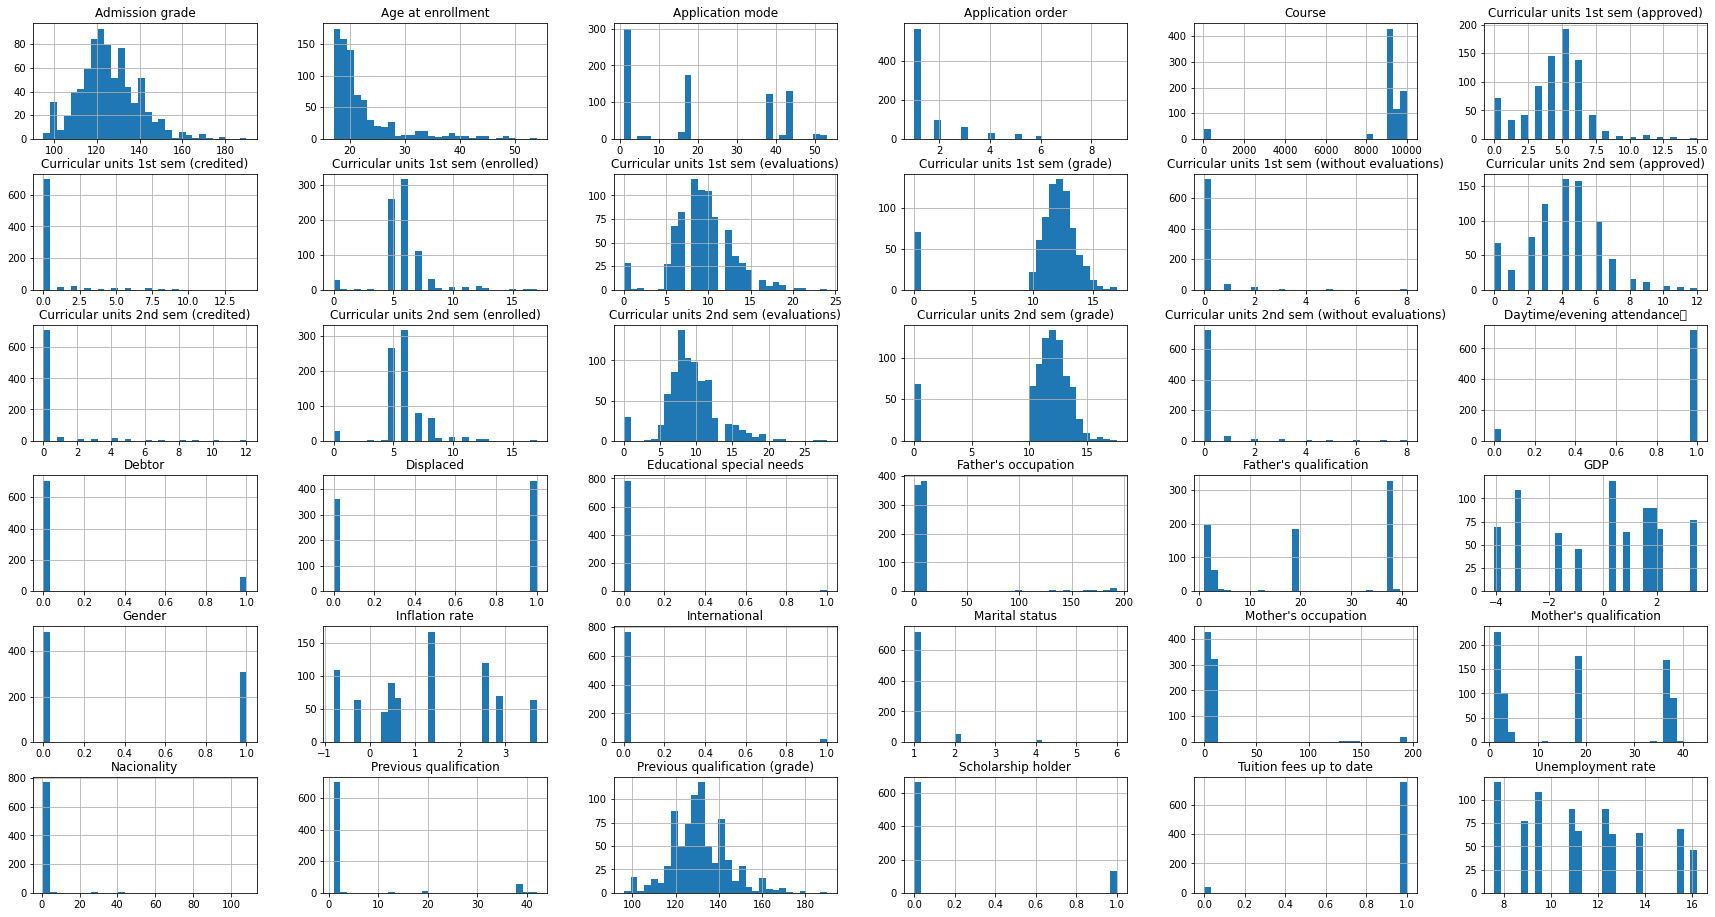

In [32]:
enrolled_data = dataset.loc[dataset["Target"] == "Enrolled"]
enrolled_data.hist(bins=30, figsize=(30, 16), sharey=False)

## Data Preprocessing

We checked the informations about the dataset and verified its consistency. After analysing the results we confirmed that there we no null values and no significant outliers, as seen in the results below, so a significant data preprocessing wasn't needed.

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [34]:
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [35]:
dataset.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Here we split the data into input and label sets for the SciKit classifiers.

In [36]:
dataset['Target'] = dataset['Target'].astype('category')

col_names = list(dataset.columns)
col_names.remove('Target')

inputs = dataset[col_names].values
labels = dataset['Target'].values

We decided to analyse the destribution of results and verifies a resonable class destribution.

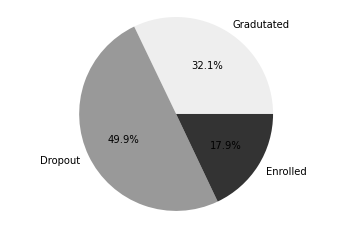

In [37]:
from collections import Counter

distribution_data = list(Counter(labels).values())

fig1, ax1 = plt.subplots()
colors = ( "#EEEEEE","#999999", "#333333") 
ax1.pie(distribution_data, colors = colors,labels=['Gradutated', 'Dropout', 'Enrolled'],autopct='%1.1f%%',)
ax1.axis('equal')  
plt.show()

### Train and Test split data

We used SciKit's built-in train_test_split function to generate train and test datasets. We define the training data using a 1/4 split of the entire dataset. . We use the stratify option in order to maintain the original dataset's class distribution.

In [38]:
from sklearn.model_selection import train_test_split

(train_in,
 test_in,
 train_classes,
 test_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1, stratify=labels)

## Resampling

Our data analysis stage showed that our working dataset was umbalanced. 

We implemented both undersampling and oversampling.These techniques differ in that undersampling removes samples from majority categories, while oversampling duplicates samples from minority categories. Oversampling is generally preffered, but undersampling generates smaller and therefore less complex datasets.

We used random undersampling that randomly chooses which samples to remove.

For oversampling we used the SMOTE (Synthetic Minority Over-sampling Technique) algorithm. This generates new samples interpolated from the existing ones.

In [39]:
from collections import Counter

print("---Train Set---")
print(Counter(train_classes))
print("\n---Test Set---")
print(Counter(test_classes))

---Train Set---
Counter({'Graduate': 1436, 'Dropout': 923, 'Enrolled': 516})

---Test Set---
Counter({'Graduate': 773, 'Dropout': 498, 'Enrolled': 278})


In [40]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

us_inputs, us_labels = rus.fit_resample(train_in, train_classes)

print(Counter(us_labels))

Counter({'Dropout': 516, 'Enrolled': 516, 'Graduate': 516})


In [41]:
from imblearn.over_sampling import SMOTE

ros = SMOTE()

os_inputs, os_labels = ros.fit_resample(train_in, train_classes)

print(Counter(os_labels))

Counter({'Graduate': 1436, 'Enrolled': 1436, 'Dropout': 1436})


Some of the algorithms we plan on using (KNN and SVM) require the data to be standardized. To do so, we used a StandardScaler from SciKit Learn's preprocessing library.

In [42]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()

scaler.fit(train_in)
train_in = scaler.fit_transform(train_in)
test_in = scaler.fit_transform(test_in)

scaler.fit(os_inputs)
os_inputs = scaler.fit_transform(os_inputs)

scaler.fit(us_inputs)
us_inputs = scaler.fit_transform(us_inputs)

# Classification

Next we used SciKit Learn's classification algorithm implementations to classify our data:

- Decision Tree Classifier
- Neural Networks
- K-Nearest Neighbors
- Support Vector Machines
- Multilayer Perceptron (NN)

## Decision Tree Classifier

##### Original dataset

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(train_in, train_classes)
dtc_prediction = dtc.predict(test_in)

dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")


--- Original dataset ---

Confusion matrix:
[[345  79  74]
 [ 76 108  94]
 [ 82 111 580]]

Classification report:
              precision    recall  f1-score   support

     Dropout       0.69      0.69      0.69       498
    Enrolled       0.36      0.39      0.38       278
    Graduate       0.78      0.75      0.76       773

    accuracy                           0.67      1549
   macro avg       0.61      0.61      0.61      1549
weighted avg       0.67      0.67      0.67      1549




##### Undersampled dataset

In [44]:
dtc.fit(us_inputs, us_labels)
dtc_prediction = dtc.predict(test_in)

dtc_us_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

--- Undersampled dataset ---

Confusion matrix:
[[330 139  29]
 [ 70 142  66]
 [ 88 249 436]]

Classification report:
              precision    recall  f1-score   support

     Dropout       0.68      0.66      0.67       498
    Enrolled       0.27      0.51      0.35       278
    Graduate       0.82      0.56      0.67       773

    accuracy                           0.59      1549
   macro avg       0.59      0.58      0.56      1549
weighted avg       0.68      0.59      0.61      1549




##### Oversampled dataset

In [45]:
dtc.fit(os_inputs, os_labels)
dtc_prediction = dtc.predict(test_in)

dtc_os_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

--- Oversampled dataset ---

Confusion matrix:
[[366 124   8]
 [ 96 168  14]
 [169 518  86]]

Classification report:
              precision    recall  f1-score   support

     Dropout       0.58      0.73      0.65       498
    Enrolled       0.21      0.60      0.31       278
    Graduate       0.80      0.11      0.20       773

    accuracy                           0.40      1549
   macro avg       0.53      0.48      0.38      1549
weighted avg       0.62      0.40      0.36      1549




#### Parameter tuning (Gridsearch)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree

#std_slc = StandardScaler()
#pca = PCA()
#pipeline = Pipeline(steps=[('std_slc', std_slc), ('pca', pca), ('dtc', dtc)])
import numpy as np

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  #'max_depth':np.linspace(1, 18, 18, endpoint=True),
                  'max_depth': [2,4,6,8,10,12,14,16,18],
                  'min_samples_leaf': min_samples_leafs,
                  'min_samples_split':min_samples_splits,
                   'max_features':[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 
                  31, 32, 33, 34, 35, 36, 37]}
grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=parameter_grid,
                           cv=5,
                           verbose=4,
                           n_jobs=10)

##### Original dataset

In [47]:
grid_search.fit(train_in, train_classes)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 5 folds for each of 8280 candidates, totalling 41400 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 284 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 3852 tasks      | elapsed:    5.3s
[Parallel(n_jobs=10)]: Done 9324 tasks      | elapsed:   12.5s
[Parallel(n_jobs=10)]: Done 16396 tasks      | elapsed:   22.1s
[Parallel(n_jobs=10)]: Done 25004 tasks      | elapsed:   34.0s
[Parallel(n_jobs=10)]: Done 35212 tasks      | elapsed:   47.0s
[Parallel(n_jobs=10)]: Done 41400 out of 41400 | elapsed:   55.4s finished


Best score: 0.7419130434782609
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 21, 'min_samples_split': 0.1, 'splitter': 'best'}
Best estimator: DecisionTreeClassifier(max_depth=10, max_features=21, min_samples_split=0.1)


In [48]:
dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

--- Improved original dataset ---

Confusion matrix:
[[389  35  74]
 [ 86  44 148]
 [ 56   9 708]]

Classification report:
              precision    recall  f1-score   support

     Dropout       0.73      0.78      0.76       498
    Enrolled       0.50      0.16      0.24       278
    Graduate       0.76      0.92      0.83       773

    accuracy                           0.74      1549
   macro avg       0.66      0.62      0.61      1549
weighted avg       0.71      0.74      0.70      1549




##### Undersampled dataset

In [49]:
grid_search.fit(us_inputs, us_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 5 folds for each of 8280 candidates, totalling 41400 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 284 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 3852 tasks      | elapsed:    3.7s
[Parallel(n_jobs=10)]: Done 9324 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done 16396 tasks      | elapsed:   12.9s
[Parallel(n_jobs=10)]: Done 25004 tasks      | elapsed:   19.7s
[Parallel(n_jobs=10)]: Done 35212 tasks      | elapsed:   28.8s


Best score: 0.6827915231234993
Best parameters: {'criterion': 'entropy', 'max_depth': 16, 'max_features': 25, 'min_samples_split': 0.1, 'splitter': 'random'}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=16, max_features=25,
                       min_samples_split=0.1, splitter='random')


[Parallel(n_jobs=10)]: Done 41400 out of 41400 | elapsed:   35.5s finished


In [50]:
dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_us_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

--- Improved undersampled dataset ---

Confusion matrix:
[[327 127  44]
 [ 37 178  63]
 [ 33 207 533]]

Classification report:
              precision    recall  f1-score   support

     Dropout       0.82      0.66      0.73       498
    Enrolled       0.35      0.64      0.45       278
    Graduate       0.83      0.69      0.75       773

    accuracy                           0.67      1549
   macro avg       0.67      0.66      0.65      1549
weighted avg       0.74      0.67      0.69      1549




##### Oversampled dataset

In [51]:
grid_search.fit(os_inputs, os_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 5 folds for each of 8280 candidates, totalling 41400 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 284 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 2236 tasks      | elapsed:    5.0s
[Parallel(n_jobs=10)]: Done 4972 tasks      | elapsed:   10.9s
[Parallel(n_jobs=10)]: Done 8508 tasks      | elapsed:   19.7s
[Parallel(n_jobs=10)]: Done 12812 tasks      | elapsed:   30.7s
[Parallel(n_jobs=10)]: Done 17916 tasks      | elapsed:   45.2s
[Parallel(n_jobs=10)]: Done 23788 tasks      | elapsed:  1.0min
[Parallel(n_jobs=10)]: Done 30460 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 37900 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 41400 out of 41400 | elapsed:  1.8min finished


Best score: 0.7177457820319006
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 27, 'min_samples_split': 0.1, 'splitter': 'best'}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=27,
                       min_samples_split=0.1)


In [52]:
dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_os_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

--- Improved oversampled dataset ---

Confusion matrix:
[[382  88  28]
 [ 89 158  31]
 [108 323 342]]

Classification report:
              precision    recall  f1-score   support

     Dropout       0.66      0.77      0.71       498
    Enrolled       0.28      0.57      0.37       278
    Graduate       0.85      0.44      0.58       773

    accuracy                           0.57      1549
   macro avg       0.60      0.59      0.56      1549
weighted avg       0.69      0.57      0.59      1549




## Neural Networks

## K-Nearest Neighbors

## Support Vector Machines

## Multilayer Perceptron (NN)